# **Submission: Proyek Pertama : Sistem Rekomendasi**
## **Anime Recommendations Systems**
- Nama: Gold Stein Maxwell Massie
- Email: goldsteinmaxwellmassie@gmail.com
- Id Dicoding: maxwellmassie


# **1. Perkenalan Dataset**

Dataset ini digunakan untuk membangun sistem rekomendasi anime berbasis Collaborative Filtering dengan pendekatan Matrix Factorization. Data ini mencakup informasi rating dari 73.516 pengguna terhadap 12.294 anime, serta metadata dari setiap anime. Variabel-variabel yang tersedia meliputi judul anime, genre, jenis (movie, TV, OVA, dll), jumlah episode, rata-rata rating, dan jumlah anggota komunitas. Sementara itu, dataset rating mencatat interaksi pengguna berupa rating yang diberikan terhadap anime tertentu, termasuk nilai -1 untuk anime yang ditonton tetapi tidak diberi rating.

Dataset ini sangat cocok untuk eksplorasi data, pembangunan model rekomendasi berbasis pembelajaran mesin, serta pemahaman pola preferensi pengguna terhadap berbagai genre dan jenis anime.
- Anime User Rating and Metadata for Recommendation System: [Kaggle](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/).

### Variabel-variabel pada Health and Lifestyle Data for Regression dataset adalah sebagai berikut:
#### 📁 `Anime.csv` (12.294 data anime)
* **anime_id** (`int64`): ID unik untuk setiap anime dari situs MyAnimeList. Digunakan sebagai penghubung dengan data rating.
* **name** (`object`): Nama lengkap atau judul dari anime.
* **genre** (`object`): Daftar genre dari anime, dipisahkan dengan koma (misalnya: Action, Adventure, Drama, Fantasy, Magic,).
* **type** (`object`): Tipe tayangan dari anime (misalnya TV, Movie, OVA, dll).
* **episodes** (`object`): Jumlah episode dari anime. Disimpan sebagai teks karena beberapa nilai bisa berupa 'Unknown' atau tidak terisi secara numerik.
* **rating** (`float64`): Rata-rata rating dari pengguna terhadap anime tersebut dalam skala 1–10.
* **members** (`int64`): Jumlah anggota komunitas yang memasukkan anime ke dalam daftar mereka. Mewakili tingkat popularitas anime.

#### 📁 `Rating.csv` (7.813.737 data interaksi pengguna)
* **user_id** (`int64`): ID anonim dari pengguna. Dibuat secara acak dan tidak mengandung informasi identitas.
* **anime_id** (`int64`): ID anime yang dirating oleh pengguna. Berfungsi sebagai *foreign key* untuk menghubungkan ke `anime_id` di `Anime.csv`.
* **rating** (`int64`): Rating yang diberikan pengguna terhadap anime. Skala 1–10. Jika bernilai -1, berarti pengguna telah menonton anime tersebut tetapi tidak memberikan rating eksplisit.

# **2. Import Library**

Pada tahap awal ini, berbagai library Python diimpor untuk mendukung proses analisis data dan pembangunan model Algoitma Content Bases Filtering dan Collaborative Filtering.

- **pandas** (`pd`): Untuk manipulasi dan analisis data berbentuk tabel (DataFrame).
- **numpy** (`np`): Untuk operasi numerik dan array multidimensi.
- **seaborn** (`sns`): Untuk visualisasi statistik dengan grafik yang menarik dan mudah.
- **matplotlib.pyplot** (`plt`): Untuk membuat grafik dan plot dasar secara fleksibel.
- **tensorflow** (`tf`) dan **keras**: Framework deep learning untuk membangun, melatih, dan evaluasi model neural network.
- **sklearn.feature_extraction.text.TfidfVectorizer**: Mengubah teks menjadi representasi numerik berbasis TF-IDF.
- **sklearn.metrics.pairwise.cosine_similarity**: Mengukur kemiripan antar vektor menggunakan cosine similarity.
- **sklearn.preprocessing.LabelEncoder**: Mengubah label kategori menjadi angka untuk pemodelan.
- **warnings**: Modul untuk mengatur dan mengabaikan pesan peringatan agar output lebih bersih.


In [1]:
# library manipulasi data
import pandas as pd
import numpy as np

# library visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# library modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# library mengabaikan waring
import warnings
warnings.filterwarnings('ignore')


# **3. Memuat Dataset**

## Tahap Memuat Dataset dari Kaggle

###  1: Upload Kredensial dan Konfigurasi Kaggle
- Mengunggah file `creds.json` yang berisi API token Kaggle agar Colab dapat mengakses dataset dari Kaggle.
- Membuat folder konfigurasi di `~/.kaggle` dan menyalin file kredensial dengan pengaturan izin akses yang aman (`chmod 600`), agar hanya pengguna yang dapat mengaksesnya.

### 2: Unduh dan Ekstrak Dataset
- Mengunduh dataset `anime-recommendations-database` dari Kaggle menggunakan perintah `kaggle datasets download`.
- Membuat folder `anime_data` sebagai tempat penyimpanan hasil ekstraksi dataset.
- Mengekstrak file ZIP dataset yang telah diunduh ke dalam folder `anime_data` secara diam-diam menggunakan opsi `-q`.

In [2]:
# upload credensial kaggle
from google.colab import files
_ = files.upload()

Saving creds.json to creds.json


In [3]:
!mkdir -p ~/.kaggle
!cp creds.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# mengunduh dataset
!kaggle datasets download -d CooperUnion/anime-recommendations-database

# membuat folder untuk mengekstrak
!mkdir -p anime_data

# mengekstrak file ZIP ke folder anime_data
!unzip -q anime-recommendations-database.zip -d anime_data

Dataset URL: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
License(s): CC0-1.0
  0% 0.00/25.0M [00:00<?, ?B/s]
100% 25.0M/25.0M [00:00<00:00, 989MB/s]


In [5]:
# Memuat data Anime
df_anime = pd.read_csv('anime_data/anime.csv')
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
# Memuat data Rating
df_rating = pd.read_csv('anime_data/rating.csv')
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# **4. Exploratory Data Analysis (EDA)**

In [7]:
# menampilkan info data anime
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


output diatas menghasilkan data anime berisi 12.294 baris data dengan 7 kolom utama: anime_id, name, genre, type, episodes, rating, dan members. Semua kolom kecuali genre, type, dan rating lengkap tanpa nilai kosong. Beberapa data di genre dan type ada yang kosong, serta kolom rating memiliki sekitar 230 nilai yang hilang. Kolom episodes bertipe objek karena beberapa nilai tidak berupa angka, misalnya ‘Unknown’. Ukuran dataset ini sekitar 672 KB, cukup ringan untuk analisis dan pemodelan.

In [8]:
# menampilkan info data rating
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


output diatas menghasilkan data rating yang terdiri dari 7.813.737 baris dan 3 kolom: user_id, anime_id, dan rating. Ketiganya bertipe data integer dan semua nilai lengkap tanpa missing. Ukuran dataset ini cukup besar, sekitar 179 MB, mencerminkan banyaknya interaksi pengguna dengan anime yang berbeda. Data ini sangat cocok untuk membangun model Collaborative Filtering yang memanfaatkan pola rating pengguna.

In [9]:
# Menampilkan Statistik deskriptif anime
df_anime[['rating', 'members']].describe()

,rating,members
count,12064.000000,1.229400e+04
mean,6.473902,1.807134e+04
std,1.026746,5.482068e+04
min,1.670000,5.000000e+00
25%,5.880000,2.250000e+02
50%,6.570000,1.550000e+03
75%,7.180000,9.437000e+03
max,10.000000,1.013917e+06


Dataset anime memiliki 12.017 data lengkap untuk kolom rating dan members. Rata-rata rating anime sekitar 6,48 dengan variasi yang cukup kecil (std 1,02), nilai rating terendah 1,67 dan tertinggi sempurna 10. Jumlah anggota komunitas (members) bervariasi sangat luas, dengan rata-rata sekitar 18.349, dari minimum 12 hingga lebih dari 1 juta, menunjukkan adanya anime yang sangat populer dan yang kurang dikenal. Sebaran jumlah anggota ini sangat besar dengan standar deviasi tinggi (55.372), menandakan variasi signifikan dalam popularitas anime.

In [10]:
# Menampilkan Statistik deskriptif kolom rating
df_rating['rating'].describe()

,rating
count,7.813737e+06
mean,6.144030e+00
std,3.727800e+00
min,-1.000000e+00
25%,6.000000e+00
50%,7.000000e+00
75%,9.000000e+00
max,1.000000e+01


Statistik deskriptif untuk kolom rating pada dataset interaksi pengguna menunjukkan terdapat 7.813.737 data dengan rata-rata rating sekitar 6,14 dari skala 1 hingga 10. Rating memiliki variasi yang cukup besar dengan standar deviasi 3,73, nilai minimum -1 (menandakan anime ditonton tanpa rating), dan nilai maksimum 10. Sebagian besar rating berada di kisaran 6 hingga 9, dengan median di angka 7, menunjukkan preferensi pengguna cenderung positif.

In [11]:
# Mengecek missing values
print("Missing Values pada df_anime:")
print(df_anime.isnull().sum())

print("\nMissing Values pada df_rating:")
print(df_rating.isnull().sum())

Missing Values pada df_anime:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing Values pada df_rating:
user_id     0
anime_id    0
rating      0
dtype: int64


Pada dataset anime, terdapat beberapa nilai yang hilang, yaitu 62 pada kolom genre, 25 pada kolom type, dan 230 pada kolom rating. Sementara itu, dataset rating tidak memiliki nilai yang hilang sama sekali, semua kolom user_id, anime_id, dan rating lengkap tanpa missing value.

In [12]:
# Mengecek Data Duplikat
print("\nDuplicate Rows in df_anime:")
print(df_anime.duplicated().sum())

print("\nDuplicate Rows in df_rating:")
print(df_rating.duplicated().sum())


Duplicate Rows in df_anime:
0

Duplicate Rows in df_rating:
1


Dataset anime tidak mengandung data duplikat sama sekali, sedangkan pada dataset rating ditemukan 1 baris duplikat. Dengan jumlah data yang sangat besar, keberadaan satu baris duplikat pada rating ini relatif kecil dan dapat dihapus untuk menjaga kualitas data.

Comedy       4645
Action       2845
Adventure    2348
Fantasy      2309
Sci-Fi       2070
Drama        2016
Shounen      1712
Kids         1609
Romance      1464
School       1220
Name: count, dtype: int64


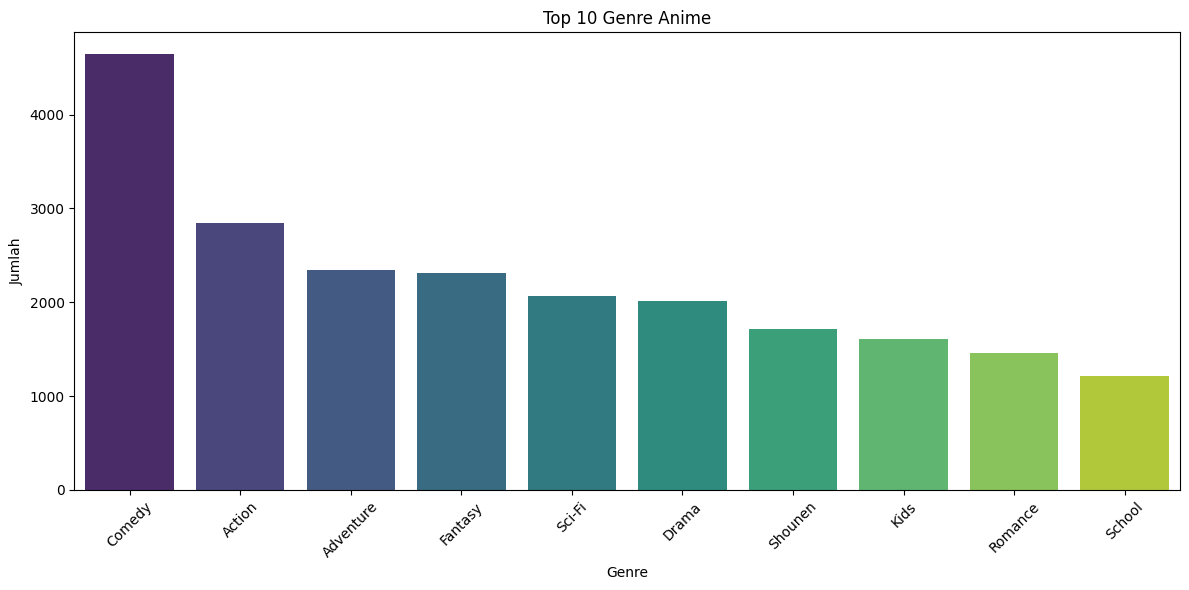

In [13]:
# mengambil semua genre, memisahkan berdasarkan koma, dan menghitung frekuensinya
all_genres = df_anime['genre'].dropna().str.cat(sep=',').split(',')
genre_counts = pd.Series(all_genres).str.strip().value_counts()  # strip() untuk hapus spasi

# menampilkan 10 genre terpopuler
print(genre_counts.head(10))

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(
    x=genre_counts.head(10).index,
    y=genre_counts.head(10).values,
    palette=sns.color_palette("viridis", n_colors=10)
)
plt.title('Top 10 Genre Anime')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk mengidentifikasi dan memvisualisasikan 10 genre anime terpopuler dari dataset dengan cara menggabungkan semua genre, memisahkannya berdasarkan koma, menghitung frekuensi kemunculannya, lalu menampilkan hasilnya dalam bentuk grafik batang yang memudahkan pemahaman distribusi genre anime paling umum. untuk penjelasan lebih lanjut hasil dari visualisasi ada pada **draf laporan README.md**

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64


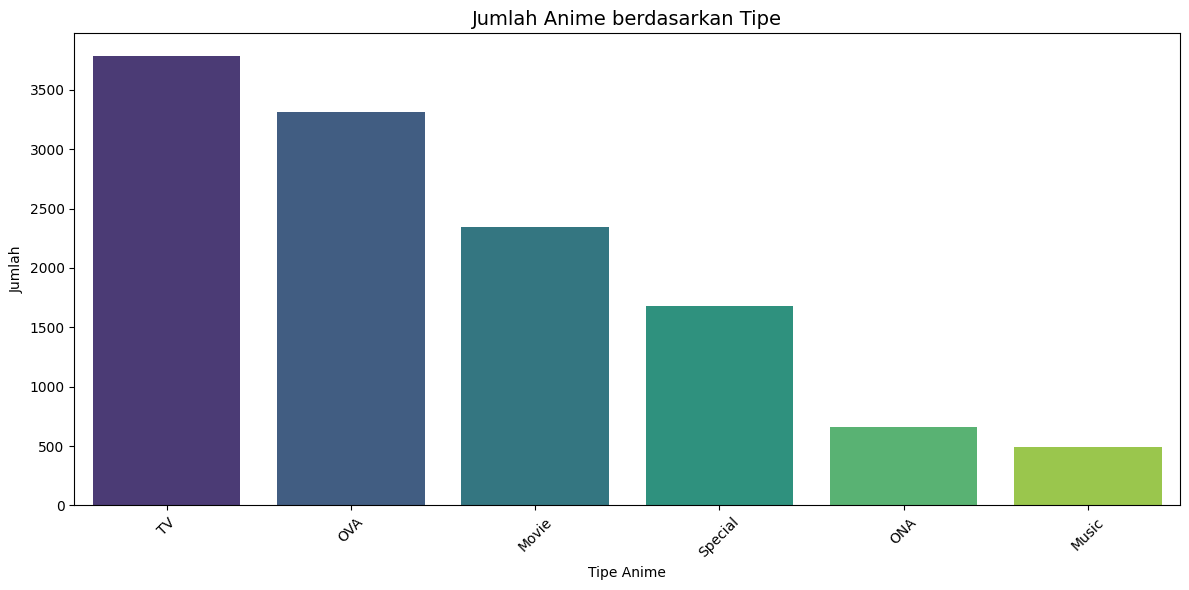

In [14]:
# Menghitung jumlah masing-masing tipe anime
type_counts = df_anime['type'].value_counts()
print(type_counts)

# Visualisasi dengan viridis colormap
plt.figure(figsize=(12, 6))
sns.barplot(
    x=type_counts.index,
    y=type_counts.values,
    palette=sns.color_palette("viridis", n_colors=len(type_counts))
)
plt.title('Jumlah Anime berdasarkan Tipe', fontsize=14)
plt.xlabel('Tipe Anime')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk menghitung dan menampilkan distribusi jumlah anime berdasarkan tipe (seperti TV, Movie, OVA, dll) dalam dataset, serta memvisualisasikan hasilnya menggunakan grafik batang dengan palet warna viridis agar mudah melihat tipe anime mana yang paling banyak tersedia.untuk penjelasan lebih lanjut hasil dari visualisasi ada pada **draf laporan README.md**

# **5. Data Preprocessing & Preparation**
1. **Sampling Data Rating**: Karena dataset rating sangat besar, maka mengambil sampel 50.000 baris secara acak untuk mempercepat proses dan mengurangi beban komputasi, sambil tetap menjaga representasi data.
2. **Membersihkan Nama Anime**: Menghapus karakter khusus pada kolom nama agar data teks lebih bersih dan konsisten, memudahkan proses analisis dan pencocokan nama.
3. **Handling Missing Values**: Menghapus baris yang memiliki nilai kosong di kolom penting seperti genre, tipe, dan rating agar model dan analisis tidak terganggu oleh data yang tidak lengkap atau bias data.
4. **Menghapus Data Duplikat**: Menghilangkan baris duplikat pada data rating untuk menjaga integritas data dan menghindari bias berlebih dalam model rekomendasi.
5. **Standarisasi Genre**: Mengambil genre pertama dari setiap anime dan menyamakan genre berdasarkan nama anime dengan mengambil genre yang paling sering muncul agar genre menjadi konsisten dan menghindari duplikasi atau inkonsistensi pada fitur genre.
6. **Menangani Rating -1**: Mengubah nilai rating -1 menjadi 0 untuk menandai anime yang ditonton tapi tidak diberi rating, sehingga memudahkan pemodelan tanpa kehilangan informasi interaksi pengguna.
7. **Mengecek Ulang Data**: Melakukan pengecekan awal pada data anime setelah preprocessing untuk memastikan transformasi berjalan sesuai harapan.


In [15]:
# 1. Sampling Data Rating
df_rating = df_rating.sample(n=50000, random_state=42).reset_index(drop=True)

# mengecek info setelah sampling
print(df_rating.info())

# mengecek beberapa baris awal
print(df_rating.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   50000 non-null  int64
 1   anime_id  50000 non-null  int64
 2   rating    50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB
None
   user_id  anime_id  rating
0    73424      7785      10
1    59789     19769       6
2    55960        59      10
3    71461      3342      10
4    55390       986       8


In [16]:
# 2. Membersihkan Nama Anime dengan mengapus karakter khusus pada kolom nama
df_anime['name'] = df_anime['name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [17]:
# 3. Handling Missing Values
# Menghapus baris yang memiliki missing value di kolom 'genre', 'type', dan 'rating'
df_anime.dropna(subset=['genre', 'type', 'rating'], inplace=True)

# Mengecek kembali Missing Values
print("Missing Values in df_anime:")
print(df_anime.isnull().sum())

print("\nMissing Values in df_rating:")
print(df_rating.isnull().sum())

Missing Values in df_anime:
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Missing Values in df_rating:
user_id     0
anime_id    0
rating      0
dtype: int64


In [18]:
# 4. Menghapus Data Duplikat
df_rating.drop_duplicates(inplace=True)

print("\nDuplicate Rows in df_rating:")
print(df_rating.duplicated().sum())


Duplicate Rows in df_rating:
0


In [19]:
# 5. Standarisasi Genre
# mengambil genre pertama dari setiap data
df_anime['genre'] = df_anime['genre'].apply(lambda x: x.split(',')[0].strip())

In [20]:
# Menyamakan Jenis genre berdsarkan name
# Ambil genre yang paling umum untuk setiap nama
genre_consensus = (
    df_anime.groupby('name')['genre']
    .agg(lambda x: x.mode().iloc[0])  # genre paling sering muncul
    .reset_index()
    .rename(columns={'genre': 'consistent_genre'})
)

# Gabungkan ke dataframe utama untuk menyamakan genre
df_anime.drop(columns='genre', inplace=True)
df_anime = df_anime.merge(genre_consensus, on='name')
df_anime.rename(columns={'consistent_genre': 'genre'}, inplace=True)


In [21]:
# mengecek apakah ada nama anime yang memiliki lebih dari 1 genre unik
genre_variation = (
    df_anime.groupby('name')['genre']
    .nunique()
    .reset_index()
    .rename(columns={'genre': 'unique_genre_count'})
)

# Filter nama yang punya lebih dari 1 genre berbeda
duplicate_genre_names = genre_variation[genre_variation['unique_genre_count'] > 1]

# Menampilkan hasil
print(f"Ada {len(duplicate_genre_names)} nama anime yang memiliki genre berbeda.")
print(duplicate_genre_names.head())


Ada 0 nama anime yang memiliki genre berbeda.
Empty DataFrame
Columns: [name, unique_genre_count]
Index: []


In [22]:
# 6. Menangani Rating -1 dengan mengganti rating -1 menjadi 0 (menandakan user menonton tanpa memberi rating)
df_rating['rating'] = df_rating['rating'].apply(lambda x: 0 if x == -1 else x)

In [23]:
# 7.Mengecek Ulang Data dataset anime_csv
df_anime.head()

,anime_id,name,type,episodes,rating,members,genre
0,32281,Kimi no Na wa,Movie,1,9.37,200630,Drama
1,5114,Fullmetal Alchemist Brotherhood,TV,64,9.26,793665,Action
2,28977,Gintama,TV,51,9.25,114262,Action
3,9253,SteinsGate,TV,24,9.17,673572,Sci-Fi
4,9969,Gintama039,TV,51,9.16,151266,Action


# **6. Pembangunan Model Solution & Result**

## **6.1 Model Solution dengan Content-Based Filtering**

In [24]:
# Menampilkan 5 data teratas pada kolom name dan genre
df_anime[['name', 'genre']].head()

,name,genre
0,Kimi no Na wa,Drama
1,Fullmetal Alchemist Brotherhood,Action
2,Gintama,Action
3,SteinsGate,Sci-Fi
4,Gintama039,Action


Langkah awal Content-Based Filtering dimulai dengan menyiapkan data yang relevan, yaitu hanya kolom name dan genre dari dataset anime. Ini dilakukan karena sistem akan merekomendasikan anime berdasarkan kemiripan genre antar judul. Menampilkan 5 data teratas berguna untuk memastikan struktur data sudah sesuai sebelum diproses lebih lanjut.

### 6.1.1 **TF-IDF Vectorizer**

In [25]:
# Inisialisasi TF-IDF Vectorizer dengan tokenizer berbasis koma
tf_idf = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])

# Melakukan fit pada data genre
tf_idf.fit(df_anime['genre'])

# Menampilkan nama-nama fitur (genre unik)
tf_idf.get_feature_names_out()

array(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons',
       'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'psychological', 'romance', 'samurai', 'school', 'sci-fi',
       'seinen', 'shoujo', 'shounen', 'slice of life', 'space', 'sports',
       'super power', 'supernatural', 'thriller', 'vampire', 'yaoi'],
      dtype=object)

selanjutnya, menggunakan TF-IDF Vectorizer untuk mengubah data genre menjadi representasi numerik berbasis bobot kata. Karena genre dipisahkan oleh koma, digunakan tokenizer khusus untuk memecahnya. Setelah proses fit, model menghasilkan daftar genre unik sebagai fitur. Hasil ini akan digunakan untuk mengukur kemiripan antar anime berdasarkan genre-nya.

In [26]:
# Transformasi genre ke bentuk matriks TF-IDF
tfidf_matrix = tf_idf.fit_transform(df_anime['genre'])

# Melihat ukuran matriks (baris = anime, kolom = genre unik)
print("Ukuran TF-IDF Matrix:", tfidf_matrix.shape)

Ukuran TF-IDF Matrix: (12017, 40)


Pada tahap ini, seluruh kolom genre dari dataset anime diubah menjadi matriks numerik menggunakan TF-IDF. Hasilnya adalah matriks berukuran 12017 baris (jumlah anime) dan 40 kolom (jumlah genre unik). Matriks ini merepresentasikan seberapa penting sebuah genre bagi setiap anime, dan menjadi dasar untuk menghitung kemiripan antar anime dalam sistem rekomendasi.

In [27]:
# Konversi ke bentuk matriks dense untuk keperluan visualisasi
dense_matrix = tfidf_matrix.todense()
print(dense_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TF-IDF matrix yang awalnya berbentuk sparse dikonversi ke bentuk dense agar lebih mudah divisualisasikan dan dipahami. Setiap baris mewakili satu anime, dan setiap kolom menunjukkan bobot TF-IDF dari sebuah genre. Nilai 0 berarti genre tersebut tidak relevan bagi anime tersebut, sementara nilai 1.0 menunjukkan tingkat relevansi genre terhadap anime.

In [28]:
# menampilkan sebagian matriks TF-IDF sebagai DataFrame
tfidf_df = pd.DataFrame(
    dense_matrix,
    columns=tf_idf.get_feature_names_out(),
    index=df_anime['name']
)

# Menampilkan contoh 10 anime (baris) dan 22 genre acak (kolom)
tfidf_df.sample(10, axis=0).sample(22, axis=1)

,shounen,military,harem,space,horror,mystery,comedy,josei,fantasy,dementia,...,magic,sci-fi,seinen,psychological,police,romance,adventure,vampire,martial arts,demons
name,,,,,,,,,,,,,,,,,,,,,
Fukuchan no Zousan Butai,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prince of Tennis Eikokushiki Teikyuu Shiro Kessen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maison Ikkoku Kanketsuhen,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mobile Suit Gundam Wing Operation Meteor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kuiba Zhi Shiwanhuoji,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mugen no Kyoukai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Esper Mami Hoshizora no Dancing Doll,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sengoku Collection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shintaisou Shin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pada tahap ini, kita mengonversi matriks TF-IDF ke dalam bentuk DataFrame agar lebih mudah dibaca dan dianalisis. Setiap baris mewakili anime berdasarkan nama, dan setiap kolom menunjukkan bobot genre tertentu. Kemudian, kita menampilkan sampel acak dari 10 anime dan 22 genre untuk melihat bagaimana genre diwakili dalam bentuk angka—nilai 1 berarti genre tersebut dominan pada anime itu, sementara 0 berarti tidak relevan. Ini akan menjadi dasar untuk menghitung kemiripan antar anime.

### 6.1.2 **Cosine Similarity**

In [29]:
# Menghitung cosine similarity antar anime berdasarkan tf-idf genre dan/atau deskripsi
cosine_sim = cosine_similarity(tfidf_matrix)

# Menampilkan matrix similarity
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

cosine similarity antar anime berdasarkan representasi TF-IDF genre. Cosine similarity ini mengukur seberapa mirip dua anime dalam hal genre yang mereka miliki — nilai 1 artinya anime sangat mirip genre sama persis, sementara nilai 0 berarti genre sangat berbeda. Matriks similarity ini menjadi dasar utama untuk merekomendasikan anime yang serupa dengan anime lain berdasarkan genre.

In [30]:
# Membuat dataframe cosine similarity antar anime, dengan index dan kolom nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_anime['name'], columns=df_anime['name'])

# Menampilkan ukuran matriks similarity
print('Shape:', cosine_sim_df.shape)

# Menampilkan sebagian matriks: 5 kolom acak, 10 baris acak
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12017, 12017)


name,Princess Princess,Rurouni Kenshin Meiji Kenkaku Romantan Shin Kyotohen,Ginga Tetsudou 999 Kimi wa Haha no You ni Aiseru ka,Nebula feat Hatsune Miku,Konchuu Monogatari Minashigo Hutch
name,,,,,
Joker Game Kuroneko Yoru no Bouken,0.0,0.0,0.0,0.0,0.0
Kinnikuman II Sei,0.0,1.0,0.0,0.0,0.0
Mujintou Monogatari X,0.0,0.0,0.0,0.0,0.0
Liccachan Fushigi na Mahou no Ring,0.0,0.0,0.0,0.0,1.0
Dagram vs RoundFacer,0.0,0.0,0.0,0.0,0.0
Agigongryong Doolie,0.0,0.0,0.0,0.0,1.0
Tsumamigui 3 The Animation,0.0,0.0,0.0,0.0,0.0
Itadaki Seieki Special,0.0,0.0,0.0,0.0,0.0
Kyoto Animation Ajisaihen,0.0,0.0,0.0,0.0,0.0


DataFrame cosine_sim_df ini berisi nilai cosine similarity antar anime berdasarkan genre, dengan indeks dan kolom berupa nama anime. Ukurannya sangat besar (12017 x 12017) karena mencakup semua pasangan anime. Nilai similarity 1 berarti dua anime memiliki genre yang sama persis, sedangkan 0 berarti berbeda. DataFrame ini memudahkan pencarian anime yang mirip genre untuk dijadikan rekomendasi dengan cepat dan efisien, karena tinggal melihat nilai similarity tertinggi di antara anime lain.

### 6.1.3 **Mendapatkan Rekomendasi**

In [31]:
# Asumsi df_anime sudah didefinisikan dan berisi kolom 'name' dan 'genre'
# # Inisialisasi TF-IDF Vectorizer
# tf = TfidfVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')])
# tfidf_matrix = tf.fit_transform(df_anime['genre'])

# # Hitung cosine similarity
# cosine_sim = cosine_similarity(tfidf_matrix)
# cosine_sim_df = pd.DataFrame(cosine_sim, index=df_anime['name'], columns=df_anime['name'])

def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=df_anime[['name', 'genre']], k=5):
    """
    Rekomendasi Anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_anime : tipe data string (str)
                 Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetris, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---

    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    # Menggabungkan dengan informasi genre untuk ditampilkan
    # Pastikan kolom untuk merge adalah 'name' di `closest` dan `items`
    return pd.DataFrame({'name': closest}).merge(items, on='name').head(k)

Fungsi anime_recommendations ini dibuat untuk memberikan rekomendasi anime yang mirip berdasarkan nama anime input. Dengan memanfaatkan matriks cosine similarity yang sudah dihitung, fungsi akan mencari k anime dengan nilai kemiripan tertinggi terhadap anime yang dicari, lalu mengembalikan daftar rekomendasi tersebut beserta genre masing-masing anime. Fungsi ini juga memastikan anime yang dicari tidak termasuk dalam rekomendasi, sehingga hasilnya hanya menampilkan anime lain yang relevan dan mirip secara genre.
- K adalah jumlah top-N rekomendasi yang ingin ditampilkan sebagai hasil akhir.
- K= 5 yang artinya akan memberikan 5 rekomendasi


In [32]:
# mengecek data anime
df_anime[df_anime['name'].eq('Kimi no Na wa')]

,anime_id,name,type,episodes,rating,members,genre
0,32281,Kimi no Na wa,Movie,1,9.37,200630,Drama


mengecek row dari anime dengan judul kimi no na wa yang genrenya adalah **Drama**

In [33]:
# Mendapatkan rekomendasi anime yang mirip dengan anime yang dipilih
anime_recommendations('Kimi no Na wa')

,name,genre
0,Minamoto no Yoritomo to Bushi no Yononaka,Drama
1,Minna Ichiban,Drama
2,Minna de Bokumetsu Inshu Unten,Drama
3,Minna de Tonda,Drama
4,Mina no Mura to Mori,Drama


memberikan rekomendasi 5 anime dengan genre yang mirip, dalam hal ini drama, berdasarkan kemiripan genre menggunakan cosine similarity dari data TF-IDF. Jadi, hasilnya adalah merekomendasikan daftar anime lain dengan genre **drama** serupa dengan "Kimi no Na wa".

## **6.2 Model Solution dengan Collaborative Filtering**

### 6.2.1 **Data Preparation untuk Collaborative Filtering**

In [34]:
# Filtering ratings

# Hanya mengambil anime yang ada di df_anime (join berdasarkan anime_id)
df_rating = df_rating[df_rating['anime_id'].isin(df_anime['anime_id'])]

# Filter user dengan minimal 5 rating (mengurangi noise dan user yang sangat jarang aktif)
user_counts = df_rating['user_id'].value_counts()
active_users = user_counts[user_counts >= 5].index
df_rating = df_rating[df_rating['user_id'].isin(active_users)]

# Reset index setelah filter
df_rating.reset_index(drop=True, inplace=True)

# Info data setelah preprocessing
print("Shape df_anime:", df_anime.shape)
print("Shape df_rating:", df_rating.shape)
print("Sample df_rating:")
print(df_rating.head())

Shape df_anime: (12017, 7)
Shape df_rating: (9342, 3)
Sample df_rating:
   user_id  anime_id  rating
0    21160     14345      10
1    51693      8312       7
2    66021     12929       0
3    56577      8630       7
4    48485      1535      10


Di tahap Data Preparation Collaborative Filtering ini, pertama-tama data rating difilter agar hanya berisi anime yang memang ada di dataset anime (berdasarkan anime_id). Kemudian, hanya user yang memberi rating minimal 5 kali yang diikutsertakan, supaya data lebih bersih dan mengurangi noise dari user yang jarang aktif. Setelah itu, index data di-reset agar rapi. Dengan langkah ini, dataset rating siap untuk digunakan dalam pemodelan Collaborative Filtering.

In [35]:
# Label Encoding
# Mengubah user_id dan anime_id menjadi representasi numerik berurutan (0, 1, 2, ...)
user_encoder = LabelEncoder()
anime_encoder = LabelEncoder()

df_rating['user'] = user_encoder.fit_transform(df_rating['user_id'])
df_rating['anime'] = anime_encoder.fit_transform(df_rating['anime_id'])

# Menyimpan jumlah unik user dan anime untuk input dimensi pada embedding layer model
num_users = df_rating['user'].nunique()
num_anime = df_rating['anime'].nunique()

print(f"Jumlah user unik: {num_users}")
print(f"Jumlah anime unik: {num_anime}")
print("\nDataFrame df_rating setelah label encoding:")
print(df_rating.head())

Jumlah user unik: 1446
Jumlah anime unik: 3296

DataFrame df_rating setelah label encoding:
   user_id  anime_id  rating  user  anime
0    21160     14345      10   372   2384
1    51693      8312       7  1020   1821
2    66021     12929       0  1336   2308
3    56577      8630       7  1144   1854
4    48485      1535      10   912    783


Selanjutnya Langkah Label Encoding ini mengubah user_id dan anime_id yang awalnya berupa angka acak atau ID asli menjadi representasi numerik berurutan mulai dari 0. Ini penting agar data bisa langsung dipakai sebagai input untuk embedding layer di model Collaborative Filtering. Setelah proses ini, kita tahu ada 1446 user unik dan 3296 anime unik yang siap diproses di model. Data df_rating kini memiliki kolom tambahan user dan anime yang berisi ID numerik baru untuk keperluan pemodelan.

In [36]:
# dari numpy array dari kolom yang sudah di-encode
user = df_rating['user'].values
anime = df_rating['anime'].values
rating = df_rating['rating'].values.astype('float32')

dataset = tf.data.Dataset.from_tensor_slices(((user, anime), rating))

dataset = dataset.shuffle(100_000).batch(1024).prefetch(tf.data.AUTOTUNE)

print(f"\nUkuran total dataset: {tf.data.experimental.cardinality(dataset).numpy() * 1024}")



Ukuran total dataset: 10240


Data yang sudah di-encode diubah menjadi numpy array, lalu dibuat menjadi tf.data.Dataset untuk pemrosesan batch dan shuffle yang efisien di TensorFlow. Dataset ini di-batch ukuran 1024 dan di-prefetch agar training lebih cepat, dengan total sekitar 10.240 data rating siap dipakai untuk modeling.

### 6.2.2 **Membagi Data untuk Training dan Validasi**

In [37]:
# Membagi Data untuk Training dan Validasi
df_shuffled = df_rating.sample(frac=1, random_state=42).reset_index(drop=True)
print("\nDataFrame df_rating setelah diacak:")
print(df_shuffled.head())

#  min dan max rating untuk normalisasi
min_rating = df_shuffled['rating'].min()
max_rating = df_shuffled['rating'].max()

# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = df_shuffled[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
# Normalisasi rating ke rentang 0-1
y = df_shuffled['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_shuffled.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(f"\nBentuk x_train: {x_train.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk x_val: {x_val.shape}")
print(f"Bentuk y_val: {y_val.shape}")

# Menampilkan sebagian kecil dari data x dan y (untuk verifikasi)
print("\nContoh x (user, anime):")
print(x[:5])
print("\nContoh y (normalized rating):")
print(y[:5])


DataFrame df_rating setelah diacak:
   user_id  anime_id  rating  user  anime
0    49832      1602      10   955    816
1    48278     28891       9   907   3052
2    38804     10775       6   742   2140
3     6583      2363       7   130   1022
4    52776      5680       8  1053   1547

Bentuk x_train: (7473, 2)
Bentuk y_train: (7473,)
Bentuk x_val: (1869, 2)
Bentuk y_val: (1869,)

Contoh x (user, anime):
[[ 955  816]
 [ 907 3052]
 [ 742 2140]
 [ 130 1022]
 [1053 1547]]

Contoh y (normalized rating):
[1.  0.9 0.6 0.7 0.8]


Data rating diacak lalu rating dinormalisasi ke rentang 0-1. Data user dan anime digabungkan sebagai fitur input (x), dan rating sebagai target (y). Data dibagi 80% untuk training dan 20% untuk validasi, menghasilkan masing-masing sekitar 7.473 dan 1.869 data, siap untuk pelatihan model collaborative filtering.

### 6.2.3 **Proses Training**

In [38]:
# Mendefinisikan Arsitektur Model
class RecommenderNet(tf.keras.Model):
    # Inisialisasi fungsi
    def __init__(self, num_users, num_anime, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_anime = num_anime
        self.embedding_size = embedding_size

        # Layer embedding untuk user
        # embeddings_initializer='he_normal' adalah inisialisasi bobot yang baik
        # embeddings_regularizer=keras.regularizers.l2(1e-6) menambahkan regularisasi L2
        # untuk mencegah overfitting
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        # Layer bias untuk user (mengatasi bias pengguna tertentu)
        self.user_bias = layers.Embedding(num_users, 1)

        # Layer embedding untuk anime
        self.anime_embedding = layers.Embedding( # Mengganti 'resto_embedding' menjadi 'anime_embedding'
            num_anime,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        # Layer bias untuk anime (mengatasi bias anime tertentu)
        self.anime_bias = layers.Embedding(num_anime, 1) # Mengganti 'resto_bias' menjadi 'anime_bias'

    def call(self, inputs):
        # inputs[:,0] adalah ID user yang di-encode
        # inputs[:,1] adalah ID anime yang di-encode
        user_vector = self.user_embedding(inputs[:,0]) # Memanggil layer embedding user
        user_bias = self.user_bias(inputs[:, 0])      # Memanggil layer bias user

        anime_vector = self.anime_embedding(inputs[:, 1]) # Memanggil layer embedding anime
        anime_bias = self.anime_bias(inputs[:, 1])        # Memanggil layer bias anime

        # Perkalian dot antara vektor user dan vektor anime
        # tf.tensordot(a, b, axes=2) melakukan perkalian dot di sepanjang 2 sumbu
        dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

        # Penambahan bias user dan bias anime
        # Hasilnya adalah prediksi rating sebelum aktivasi sigmoid
        x = dot_user_anime + user_bias + anime_bias

        # Fungsi aktivasi sigmoid mengkompresi output ke rentang 0-1
        # Ini sesuai dengan normalisasi rating yang kita lakukan sebelumnya
        return tf.nn.sigmoid(x)

Model RecommenderNet ini adalah neural network untuk collaborative filtering yang memanfaatkan embedding untuk merepresentasikan user dan anime dalam ruang berdimensi rendah. Setiap user dan anime diubah menjadi vektor embedding yang dilatih, kemudian prediksi rating dibuat dengan menghitung dot product vektor user dan anime, ditambah bias masing-masing. Outputnya diaktifkan dengan sigmoid agar berada di rentang 0 1, sesuai dengan rating yang telah dinormalisasi. Regularisasi L2 juga diterapkan pada embedding untuk mengurangi overfitting.

In [39]:
# Inisialisasi dan Kompilasi Model
# Menentukan ukuran embedding
EMBEDDING_SIZE = 50

# Buat instance model
model = RecommenderNet(num_users, num_anime, EMBEDDING_SIZE)

# Kompilasi model
# optimizer: Adam adalah optimizer yang umum dan efektif
# loss: Mean Absolute Error (MAE) atau Mean Squared Error (MSE) cocok untuk masalah regresi (prediksi rating)
# metrics: RMSE adalah metrik yang umum digunakan untuk evaluasi model rekomendasi
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(), # Menggunakan MSE karena lebih sensitif terhadap error besar
    metrics=[tf.keras.metrics.RootMeanSquaredError()] # Menambahkan RMSE sebagai metrik
)


menginisialisasi model RecommenderNet dengan ukuran embedding 50, kemudian mengompilasi model tersebut menggunakan optimizer Adam dengan learning rate 0.001. Fungsi loss yang dipakai adalah Mean Squared Error (MSE), yang efektif untuk masalah regresi karena memberikan penalti lebih besar pada kesalahan prediksi yang besar. Sebagai metrik evaluasi, digunakan Root Mean Squared Error (RMSE) yang umum untuk menilai akurasi model rekomendasi, karena mengukur rata-rata kesalahan prediksi dalam skala yang sama dengan rating.

### 6.2.3 **Training Model**

proses training model dengan memanggil fungsi fit() pada model yang sudah dibuat. Model dilatih menggunakan data training (x_train, y_train) dengan batch size 32 dan selama 100 epoch. Selama training, juga dilakukan validasi pada data validasi (x_val, y_val) untuk memonitor performa model agar tidak overfit. Opsi verbose=1 membuat proses training menampilkan progres setiap epoch, sehingga kamu bisa melihat perkembangan loss dan metrik RMSE selama pelatihan. Setelah selesai, akan muncul pesan bahwa proses training telah selesai.


In [40]:
# Training Training Model
print("\nMemulai proses training model...")
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32, # Ukuran batch yang lebih kecil dari tf.data.Dataset batch (1024)
                    # karena ini adalah batch untuk proses training di Keras fit
    epochs=100,      # Jumlah epoch, sesuaikan sesuai kebutuhan dan kinerja
    validation_data=(x_val, y_val),
    verbose=1       # Menampilkan progress training
)
print("\nProses training selesai.")


Memulai proses training model...
Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1186 - root_mean_squared_error: 0.3441 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3416
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1090 - root_mean_squared_error: 0.3299 - val_loss: 0.1142 - val_root_mean_squared_error: 0.3377
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1008 - root_mean_squared_error: 0.3173 - val_loss: 0.1111 - val_root_mean_squared_error: 0.3330
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0982 - root_mean_squared_error: 0.3130 - val_loss: 0.1086 - val_root_mean_squared_error: 0.3292
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0948 - root_mean_squared_error: 0.3076 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3242
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0903 - root_mean_squared_error: 0.3001 - val_loss: 0.1032 - val_root_mean_squared_error: 0.3209
Epoch 7/100

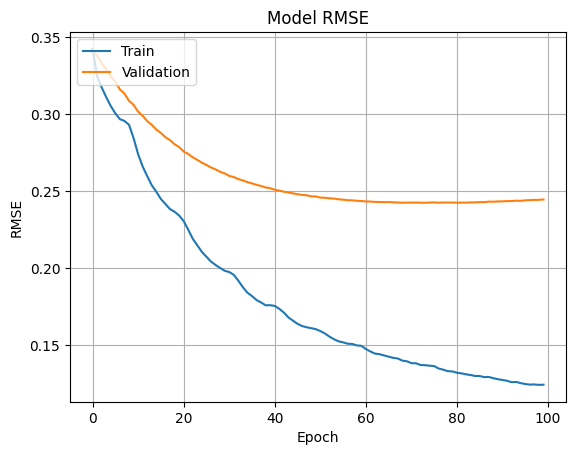

In [41]:
# fungsi untuk visualisasi traning dan validation agar bisa di panggil lagi
def plot_rmse(history):
    """
    Fungsi untuk menampilkan visualisasi RMSE dari training dan validation model.

    Parameter:
    - history: objek history dari hasil model.fit()
    """
    plt.plot(history.history['root_mean_squared_error'])
    plt.plot(history.history['val_root_mean_squared_error'])
    plt.title('Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(True)
    plt.show()
plot_rmse(history)

untuk memvisualisasikan performa model selama training dan validasi dengan menampilkan grafik RMSE (Root Mean Squared Error) dari setiap epoch. Dengan memanggil fungsi ini dan memasukkan objek history hasil dari model.fit(), dengan ini bisa melihat tren penurunan error baik pada data training maupun validasi sehingga bisa menilai apakah model belajar dengan baik atau terjadi overfitting/underfitting. Grafik ini membantu memonitor kualitas model secara visual dan mudah dipahami. untuk penjelasan lebih lanjut hasil dari visualisasi ada pada **draf laporan README.md**

### 6.2.4 **Mendapatkan Rekomendasi**

In [42]:
# Inisialisasi DataFrame anime_df dari df_anime untuk memudahkan penggabungan
anime_df = df_anime # Pastikan df_anime sudah dimuat dan berisi kolom 'anime_id', 'name', 'genre'

anime_df dibuat sebagai alias atau salinan dari df_anime agar lebih mudah digunakan untuk penggabungan data (merge) pada proses rekomendasi, dengan catatan bahwa df_anime sudah harus ada dan memuat kolom penting seperti 'anime_id', 'name', dan 'genre'. Jadi, anime_df siap dipakai sebagai basis data anime untuk langkah selanjutnya dalam sistem rekomendasi.

In [43]:
# Mengambil sampel user secara acak
user_id = df_rating['user_id'].sample(1).iloc[0]
print(f"Mengambil user_id acak: {user_id}")

# Mendapatkan anime yang sudah ditonton oleh user ini
anime_visited_by_user = df_rating[df_rating['user_id'] == user_id]


Mengambil user_id acak: 46801


mengambil secara acak satu user_id dari data rating kemudian mencari semua anime yang sudah pernah ditonton atau dinilai oleh user tersebut dengan memfilter data berdasarkan user_id tersebut, sehingga kita dapat mengetahui riwayat preferensi user sebelum memberikan rekomendasi anime baru.

In [44]:
# Menentukan daftar anime yang BELUM pernah ditonton oleh pengguna
anime_not_visited_ids = anime_df[~anime_df['anime_id'].isin(anime_visited_by_user['anime_id'].values)]['anime_id']

anime_not_visited_encoded = []
for anime_id_actual in anime_not_visited_ids:
    if anime_id_actual in anime_encoder.classes_:
        anime_not_visited_encoded.append(anime_encoder.transform([anime_id_actual])[0])

if not anime_not_visited_encoded:
    print("Tidak ada anime yang belum ditonton atau anime tersebut tidak ada di data encoder. Mengambil anime acak.")
    all_anime_encoded_ids = df_rating['anime'].unique()
    np.random.shuffle(all_anime_encoded_ids)
    anime_not_visited_encoded = all_anime_encoded_ids[:10].tolist()

anime_not_visited_encoded = np.array(anime_not_visited_encoded).reshape(-1, 1)
user_encoded = user_encoder.transform([user_id])[0]

user_anime_array = np.hstack(
    ([[user_encoded]] * len(anime_not_visited_encoded), anime_not_visited_encoded)
)

print(f"\nJumlah anime kandidat yang belum ditonton: {len(user_anime_array)}")


Jumlah anime kandidat yang belum ditonton: 3290


menentukan daftar anime yang belum pernah ditonton oleh user yang dipilih. Pertama, kode mencari semua anime_id yang tidak ada di riwayat tontonan user tersebut (anime_not_visited_ids). Kemudian, anime-anime tersebut diubah ke bentuk numerik ter-encode menggunakan anime_encoder. Jika ternyata tidak ada anime yang belum ditonton (atau tidak ditemukan dalam encoder), kode akan mengambil 10 anime acak sebagai kandidat. Selanjutnya, kode membuat array user_anime_array yang berisi pasangan encoded dari user dan anime kandidat, untuk nanti digunakan sebagai input prediksi model. Output menunjukkan berapa banyak anime kandidat yang siap direkomendasikan.

In [45]:
# Memprediksi rating untuk anime yang belum ditonton
print("\nMemprediksi rating untuk anime kandidat...")
predicted_ratings = model.predict(user_anime_array).flatten()



Memprediksi rating untuk anime kandidat...
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


melakukan prediksi rating menggunakan model rekomendasi untuk semua anime yang belum ditonton oleh user. Inputnya adalah array user_anime_array yang berisi pasangan user dan anime encoded. Fungsi model.predict() menghasilkan prediksi rating untuk tiap pasangan tersebut dalam bentuk array, kemudian flatten() mengubah hasil prediksi menjadi satu dimensi agar mudah diproses selanjutnya. Dengan begitu, kita mendapatkan perkiraan seberapa besar kemungkinan user akan menyukai anime-anime kandidat tersebut.

In [46]:
# Mendapatkan 10 Rekomendasi Teratas
top_ratings_indices = predicted_ratings.argsort()[-10:][::-1]

recommended_anime_encoded_ids = [anime_not_visited_encoded[x][0] for x in top_ratings_indices]

# Membuat mapping dari encoded ID ke original ID
anime_encoded_to_anime_id = {
    encoded_id: original_id for original_id, encoded_id in zip(anime_encoder.classes_, range(len(anime_encoder.classes_)))
}

recommended_anime_ids_original = [
    anime_encoded_to_anime_id.get(encoded_id) for encoded_id in recommended_anime_encoded_ids
]

print('\n=== Rekomendasi untuk Pengguna: {} ==='.format(user_id))

# Menampilkan Anime dengan Rating Tinggi dari Pengguna
print('\nAnime dengan rating tinggi dari user (Top 5):')
print('-----------------------------------------')

top_anime_user = (
    anime_visited_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
)

# Merge dengan df_anime untuk mendapatkan detail nama dan genre
top_anime_user_details = pd.merge(top_anime_user, anime_df[['anime_id', 'name', 'genre']], on='anime_id', how='left')

# Menampilkan detail anime yang sudah dirating tinggi
for row in top_anime_user_details.itertuples():
    # Pastikan kolom 'name' dan 'genre' ada di row
    print(f"[{row.rating}]: {row.name} - Genre: {row.genre}")

print('-----------------------------------------')

# Menampilkan Top 10 Rekomendasi Anime
print('\nTop 10 Rekomendasi Anime:')
print('-----------------------------------------')

# Filter df_anime berdasarkan ID anime yang direkomendasikan
# Mengurutkan berdasarkan urutan rekomendasi (dari tertinggi ke terendah)
recommended_anime_details = anime_df[anime_df['anime_id'].isin(recommended_anime_ids_original)].copy()

# Tambahkan kolom 'predicted_rating' ke DataFrame rekomendasi untuk visualisasi
# merge hasil prediksi dengan detail anime
recommended_anime_details['predicted_rating'] = recommended_anime_details['anime_id'].map(
    dict(zip(recommended_anime_ids_original, predicted_ratings[top_ratings_indices]))
)
# Sortir berdasarkan predicted_rating secara menurun
recommended_anime_details = recommended_anime_details.sort_values(by='predicted_rating', ascending=False)


# Menampilkan detail anime yang direkomendasikan
for row in recommended_anime_details.itertuples():
    # Memastikan kolom 'name' dan 'genre' ada di row
    print(f"[{row.predicted_rating:.2f}]: {row.name} - Genre: {row.genre}") # Tampilkan rating prediksi juga

print('-----------------------------------------')


=== Rekomendasi untuk Pengguna: 46801 ===

Anime dengan rating tinggi dari user (Top 5):
-----------------------------------------
[10]: Mirai Nikki Redial - Genre: Action
[10]: Kono Naka ni Hitori Imouto ga Iru - Genre: Comedy
[10]: No Game No Life Specials - Genre: Ecchi
[8]: Death Note - Genre: Mystery
[7]: Denkigai no Honyasan - Genre: Comedy
-----------------------------------------

Top 10 Rekomendasi Anime:
-----------------------------------------
[0.97]: Hunter x Hunter 2011 - Genre: Action
[0.97]: Gintama039 - Genre: Action
[0.97]: Kaze no Tani no Nausica - Genre: Adventure
[0.96]: Kyoukaisenjou no Horizon - Genre: Action
[0.96]: Angel Beats - Genre: Action
[0.96]: Jormungand - Genre: Action
[0.96]: The iDOLMSTER - Genre: Comedy
[0.96]: Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai - Genre: Drama
[0.96]: Fatestay night Unlimited Blade Works 2nd Season - Genre: Action
[0.96]: Angel Beats Another Epilogue - Genre: Drama
-----------------------------------------


melakukan beberapa hal penting untuk menghasilkan dan menampilkan rekomendasi anime bagi pengguna tertentu:

1. Memilih 10 anime dengan prediksi rating tertinggi dari daftar anime yang belum ditonton user. Ini dilakukan dengan mengurutkan indeks prediksi (predicted_ratings) dan mengambil 10 teratas secara terbalik agar rating tertinggi di depan.

2. Mengonversi ID anime yang sudah di-encode kembali ke ID asli menggunakan dictionary anime_encoded_to_anime_id agar bisa dicocokkan dengan data asli.

3. Menampilkan 5 anime terbaik yang sudah pernah ditonton user, berdasarkan rating tertinggi, dengan menampilkan nama dan genre anime tersebut.

4. Menampilkan 10 anime rekomendasi terbaik berdasarkan prediksi rating model dengan detail nama, genre, dan nilai prediksi rating, yang disusun dari nilai tertinggi ke terendah.


**Hasil rekomendasi**:

Hasil di atas adalah rekomendasi untuk user dengan ID 46801. Dari output tersebut, dapat dilihat bahwa anime yang telah diberi rating tinggi oleh user didominasi oleh genre Action dan Comedy, dengan tambahan genre lain seperti Mystery dan Ecchi. Contohnya, Mirai Nikki Redial (Action), Kono Naka ni Hitori Imouto ga Iru (Comedy), dan No Game No Life Specials (Ecchi) menunjukkan bahwa user memiliki ketertarikan terhadap anime yang penuh aksi, humor, dan elemen hiburan ringan.

Sementara itu, daftar Top 10 rekomendasi anime untuk user ini sebagian besar mengandung genre Action, dengan tambahan genre seperti Adventure, Comedy, dan Drama. Beberapa anime yang direkomendasikan seperti Hunter x Hunter 2011, Gintama039, dan Kyoukaisenjou no Horizon menunjukkan bahwa model berupaya menyarankan anime dengan tema dan nuansa yang mirip dengan preferensi user. Dengan kata lain, model collaborative filtering berhasil menyesuaikan rekomendasi berdasarkan pola kesukaan user sebelumnya, sehingga hasil rekomendasi bersifat relevan dan berpotensi disukai.

# **7. Evaluasi**

## **7.1. Evaluasi Content-Based**

**Metrik Evaluasi Sistem Rekomendasi: Presisi**

Presisi adalah metrik yang digunakan untuk mengukur seberapa relevan item yang direkomendasikan oleh sistem. Ini dihitung sebagai rasio jumlah rekomendasi yang relevan dengan total jumlah item yang direkomendasikan.

Rumus untuk presisi (`P`) adalah sebagai berikut:

$$
P = \frac{\text{# of our recommendations that are relevant}}{\text{# of items we recommended}}
$$

Di mana:
- $\text{# of our recommendations that are relevant}$: Jumlah item yang direkomendasikan oleh sistem yang benar-benar relevan bagi pengguna.
- $\text{# of items we recommended}$: Total jumlah item yang direkomendasikan oleh sistem kepada pengguna.

---

**Contoh Hasil:**

**Berdasarkan Hasil SubBab `6.1.3 Mendapatkan Rekomendasi`**
Jika sistem rekomendasi merekomendasikan 5 film, dan ke5 film tersebut relevan bagi pengguna, maka presisinya adalah:

$$
P = \frac{5}{5} = 1
$$

Ini berarti **100%** dari rekomendasi adalah relevan.

## **7.2 Evaluasi Collaborative Filtering**

**Metrik Evaluasi Collaborative Filtering: MSE & RMSE**

Dalam sistem rekomendasi berbasis Collaborative Filtering, Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE) adalah metrik umum yang digunakan untuk mengevaluasi akurasi prediksi model. Keduanya mengukur rata-rata kuadrat atau akar kuadrat dari kesalahan (selisih antara nilai prediksi dan nilai sebenarnya).

---

#### Mean Squared Error (MSE)

MSE mengukur rata-rata dari kuadrat error (selisih) antara nilai yang diprediksi dan nilai aktual. Karena mengkuadratkan error, MSE memberikan bobot yang lebih besar pada error yang besar, sehingga sensitif terhadap outlier.

**Rumus MSE:**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Di mana:
* $n$: Jumlah observasi (data).
* $y_i$: Nilai aktual (misalnya, rating sebenarnya yang diberikan pengguna).
* $\hat{y}_i$: Nilai prediksi (misalnya, rating yang diprediksi oleh model).

---

#### Root Mean Squared Error (RMSE)

RMSE adalah akar kuadrat dari MSE. Ini lebih mudah diinterpretasikan karena unitnya sama dengan unit variabel output (misalnya, unit rating). RMSE juga sensitif terhadap error besar, sama seperti MSE.

**Rumus RMSE:**

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{\text{MSE}}
$$

Di mana:
* $n$: Jumlah observasi (data).
* $y_i$: Nilai aktual.
* $\hat{y}_i$: Nilai prediksi.

#### Contoh Implementasi dan Hasil Evaluasi

Dalam konteks model Collaborative Filtering , menghitung MSE dan RMSE setelah proses pelatihan. Berikut adalah contoh kode dan output yang menunjukkan hasil evaluasi:

```python
# 'x_val' dan 'y_val' adalah data validasi dan labelnya
results = model.evaluate(x_val, y_val, verbose=1)

print("\nHasil Evaluasi pada Data Validasi:")
print(f"Loss (MSE): {results[0]:.4f}")
print(f"RMSE: {results[1]:.4f}")
```

In [47]:
# MSE & RMSE
results = model.evaluate(x_val, y_val, verbose=1)

print("\nHasil Evaluasi pada Data Validasi:")
print(f"Loss (MSE): {results[0]:.4f}")
print(f"RMSE: {results[1]:.4f}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0639 - root_mean_squared_error: 0.2524

Hasil Evaluasi pada Data Validasi:
Loss (MSE): 0.0599
RMSE: 0.2445


Hasil evaluasi Collaborative Filtering menunjukkan performa model pada data validasi dengan nilai loss (MSE) sebesar sekitar 0.0599 dan RMSE sekitar 0.2445. Nilai MSE yang kecil menunjukkan bahwa rata-rata kuadrat selisih antara rating asli dan prediksi model cukup rendah, artinya model mampu memprediksi rating dengan akurasi yang baik.

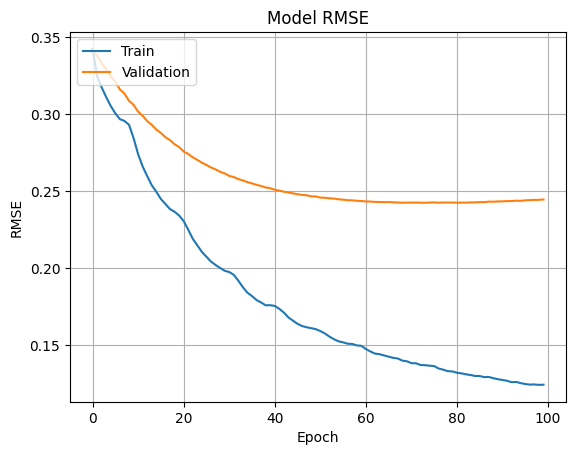

In [48]:
# memanggil kembali def fungsi visualisasi training dan validasi
plot_rmse(history)

untuk penjelasan lebih lanjut hasil dari visualisasi ada pada **draf laporan README.md**